In [3]:
from IPython.display import Image

# Deployment on GCP

### Given:
- a collection of steaming and CRM (Customer Relational Management) system data
- data available on GCP BigQuery

### Problem:
- how can this solution be deployed in a production environment?


# Proposed pipeline

## As shown below in the diagram:
1. the model can be retrained (with the ability to get to more data directly from BigQuery) on GCP's AutoML.
2. AutoML is a good option here because it supports model deployment as well as batched API predictions. This is ideal for our case since the data is updated daily and will likely be processed in big batches rather than in a stream. 
3. The Prediction API receives batches of data from Big Query. To do this in the right time, a scheduler could be set up during non-active hours in order to access BigQuery without issues or needing to scale.
4. in this deployment scheme, there is a flywheel but with a manual step. Since trends and services change from time to time, it is likely that new features which affect churn rate will arise or change with time. To keep up with this, data from BigQuery should be fed back into the Cloud AutoML service and the model needs to be re-evaluated and retrained. This is also a golden opportunity to decrease class imbalance in the dataset by getting mode data from the `0` label (other techniques could be applied as well). Since we are using Random Forests, it is always possible to re-assess the importance of each feature and improve the model with each iteration.


## What if we were not using AutoML?
In this case, the pipeline will differ in some aspects. Instead of using a cloud service to train models directly on the cloud, we would instead train it on a VM or instance, store and dockerize the model, then prep it for deployment alongside an API endpoint. If that had been the case, it would likely have been deployed on Google's App Engine and the endpoint would be served using an API (or by going through a Google Function). Automatic scaling is preferred in this case since data is likely to be processed in batches, so the machine's memory/CPU usage is likely to spike only during a scheduled time. If the model is too big, it should be stored on Google Cloud Storage instead of being inside the docker container.

## Assessing the model:
- Perform cross-validation to assess the performance
- Track the increase or decrease of churn rate over time, taking external factors into account (for example, bigger companies always have higher churn rate when they experience growth; this way, the pure correlation will make the model look bad even though it has been performing well).


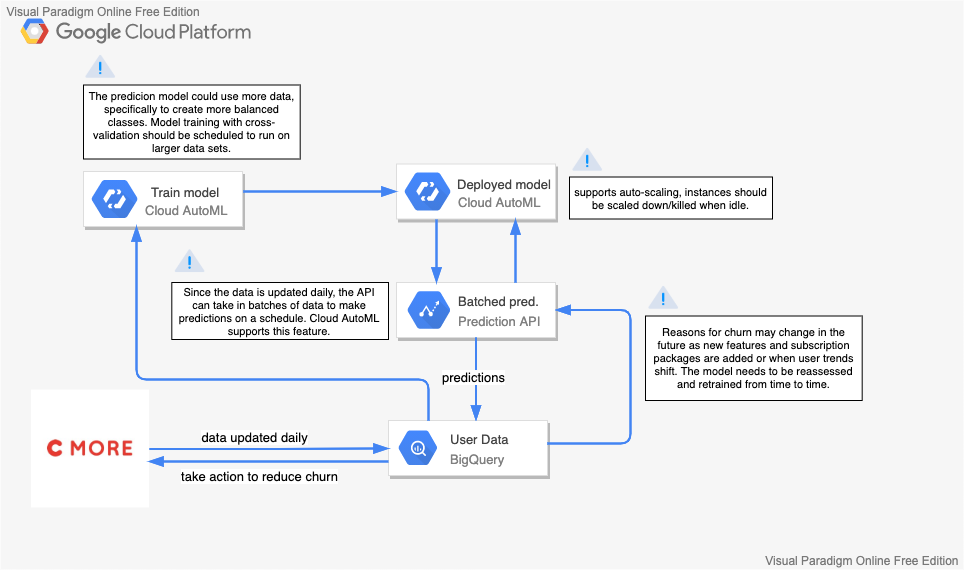

In [8]:
Image(filename='diagram_deployment.png') 